#flight Price Predictions(EDA + Feature Engineering)

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
%matplotlib inline

In [323]:
train_df =pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [324]:
test_df =pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [325]:
final_df=train_df.append(test_df)
final_df.tail()

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_19709/3912113296.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [326]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


#Feature Engineering process

In [327]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [328]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


Using lamda function to do the split

In [329]:
#lamda function can also be used to execute this function
'''
final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])
'''

"\nfinal_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])\nfinal_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])\nfinal_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])\n"

In [330]:
final_df['Date']= final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [331]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [332]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [333]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019


In [334]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [335]:
final_df['Arrival_hour']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df['Arrival_min']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [336]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [337]:
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [338]:
final_df['Dep_hour']=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dep_min']=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_min']=final_df['Dep_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df.head(1)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [339]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dep_hour         13354 non-null  int64  
 14  Dep_min          13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


<AxesSubplot:ylabel='Airline'>

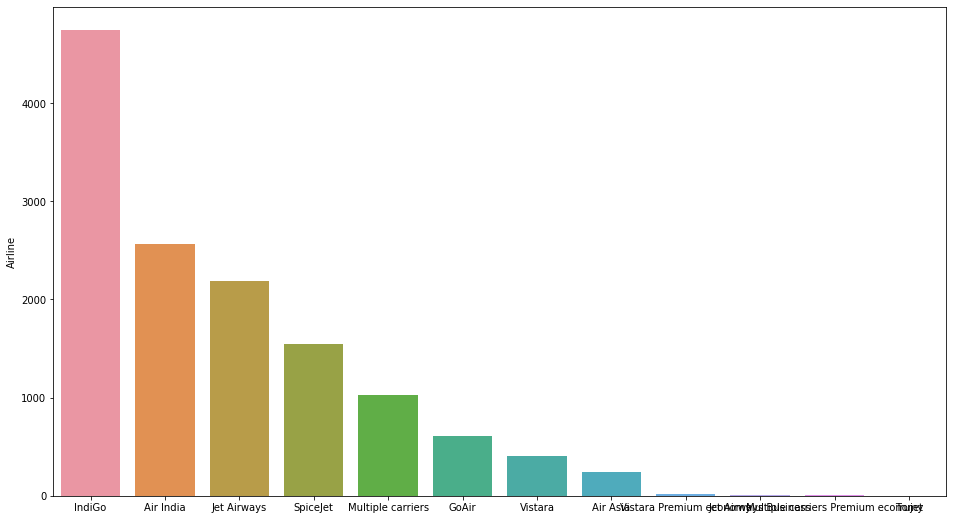

In [340]:
plt.rcParams["figure.figsize"] = [16,9]
sns.barplot(x=final_df['Airline'].unique(),y=final_df['Airline'].value_counts())


In [341]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [342]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [343]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4,'nan':1})
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [344]:
final_df.drop('Route',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20


In [345]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [346]:
final_df['Duration_hr']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [347]:
final_df['Duration_min']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [348]:
final_df.drop('Duration',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50


In [349]:
final_df[final_df['Duration_hr']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m,NaN
2660,Air India,Mumbai,Hyderabad,2.0,No info,NaN,12,3,2019,16,55,16,50,5m,NaN


In [350]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [351]:
final_df[final_df['Duration_hr']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [352]:
final_df['Duration_hr'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [353]:
final_df['Duration_hr']=final_df['Duration_hr'].astype('int')

In [354]:
final_df['Duration_hr']*60

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration_hr, Length: 13351, dtype: int64

In [355]:
final_df['Duration_min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [356]:
#df[df.isna().any(axis=1)]]
final_df[final_df['Duration_min'].isna()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
18,Air India,Delhi,Cochin,2.0,No info,13381.0,12,6,2019,19,15,20,15,23,NaN
33,Jet Airways,Delhi,Cochin,2.0,In-flight meal not included,10919.0,15,6,2019,12,35,14,35,22,NaN
44,Multiple carriers,Delhi,Cochin,1.0,No info,13062.0,21,3,2019,21,0,9,0,12,NaN
53,IndiGo,Banglore,Delhi,0.0,No info,3943.0,18,6,2019,0,15,21,15,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Air India,Delhi,Cochin,0.0,No info,NaN,27,3,2019,17,10,14,10,3,NaN
2598,Jet Airways,Delhi,Cochin,1.0,No info,NaN,9,6,2019,19,0,8,0,11,NaN
2604,Multiple carriers,Delhi,Cochin,1.0,No info,NaN,12,6,2019,19,15,9,15,10,NaN
2607,Multiple carriers,Delhi,Cochin,1.0,No info,NaN,3,3,2019,21,0,8,0,13,NaN


In [365]:
final_df['Duration_min']=final_df['Duration_min'].fillna(0)

In [366]:
final_df[final_df['Duration_min'].isna()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [367]:
final_df['Duration_min']=final_df['Duration_min'].astype('int')

In [368]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  Duration_hr      13351 non-null  int64  
 14  Duration_min     13351 non-null  int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 1.6+ MB


In [369]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [370]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

In [371]:
final_df['Airline']=labelEncoder.fit_transform(final_df['Airline'])
final_df['Source']=labelEncoder.fit_transform(final_df['Source'])
final_df['Destination']=labelEncoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelEncoder.fit_transform(final_df['Additional_Info'])

In [373]:
final_df.shape

(13351, 15)

In [374]:
final_df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,0
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,0
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,0
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,0


In [375]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int64  
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int64  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  Duration_hr      13351 non-null  int64  
 14  Duration_min     13351 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.6 MB


In [376]:
'''
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
final_df['Airline']=ohe.fit_transform(final_df['Airline'])
final_df['Source']=ohe.fit_transform(final_df['Source'])
final_df['Destination']=ohe.fit_transform(final_df['Destination'])
final_df['Additional_Info']=ohe.fit_transform(final_df['Additional_Info'])
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\nfinal_df['Airline']=ohe.fit_transform(final_df['Airline'])\nfinal_df['Source']=ohe.fit_transform(final_df['Source'])\nfinal_df['Destination']=ohe.fit_transform(final_df['Destination'])\nfinal_df['Additional_Info']=ohe.fit_transform(final_df['Additional_Info'])\n"

In [377]:
pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,1,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,6,6,2019,20,25,20,30,23,...,0,0,0,0,0,0,0,0,1,0
2667,0.0,NaN,27,3,2019,16,55,14,20,2,...,0,0,0,0,0,0,0,0,1,0
2668,1.0,NaN,6,3,2019,4,25,21,50,6,...,0,0,0,0,0,0,0,0,1,0
2669,1.0,NaN,6,3,2019,19,15,4,0,15,...,0,0,0,0,0,0,0,0,1,0


In [378]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int64  
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int64  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  Duration_hr      13351 non-null  int64  
 14  Duration_min     13351 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.6 MB
